## To Explore Supervised Machine Learning

#  In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regressioon task as it involves just two variable. 
Data can be found at http://bit.ly/w-data

In [1]:
## Importing libraries for this task
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Reading the data to a dataframe
data = pd.read_csv("E:/Pandas/intern.csv")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Since the dataset is quite small so visualizing the data will give a better picture of the correlation between variable.

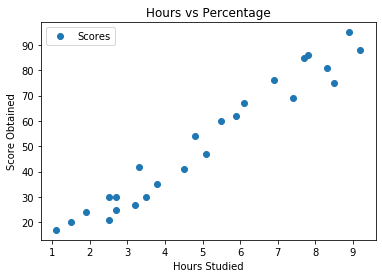

In [6]:
data.plot(x = 'Hours', y = 'Scores',style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Score Obtained')
plt.show()

In [7]:
# Now lets divide our dta to independent and dependent variable

In [8]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

In [11]:
x_train


array([[6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [12]:
y_train


array([76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21, 54, 95, 41],
      dtype=int64)

In [13]:
x_test


array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9],
       [7.8]])

In [14]:
y_test

array([20, 27, 69, 30, 62, 35, 24, 86], dtype=int64)

## Training the Algorithm

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() ## Create an object of Linear regression

In [16]:
reg.fit(x_train,y_train) # fitting the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print("Training is completed")

Training is completed


Its time for visualizing the linear regression, i.e how the line will fit to the data

In [18]:
l = reg.coef_*x+reg.intercept_
l

array([[26.8422321 ],
       [52.29250548],
       [33.69422878],
       [85.57363222],
       [36.63079879],
       [17.05366541],
       [92.4256289 ],
       [56.20793216],
       [83.61591888],
       [28.79994544],
       [77.74277887],
       [60.12335883],
       [46.41936547],
       [34.67308545],
       [13.13823874],
       [89.48905889],
       [26.8422321 ],
       [20.96909209],
       [62.08107217],
       [74.80620886],
       [28.79994544],
       [49.35593548],
       [39.56736879],
       [69.91192552],
       [78.72163554]])

In [19]:
## Ploting for testing data

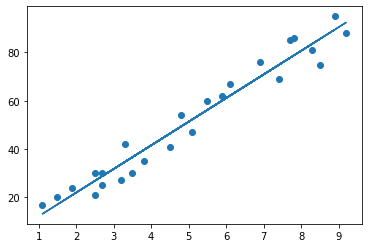

In [20]:
plt.scatter(x,y)
plt.plot(x,l)
plt.show()

In [21]:
# To retieve the intercept and coefficient
print("intercept is :",reg.intercept_)


intercept is : 2.370815382341881


print("Coefficient is :",reg.coef_)


his means that for ecery one unit of changes in hours studied, the change in the score is about 9.7885%. Or in simpler words, if a student studies one hour more than they previously studied an exam, they  cancan expect to achieve an increase of 9.78% in the score achieved by the student previously.

# Now first make prediction on testing data

In [23]:
y_pred = reg.predict(x_test)

In [24]:
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

The y_pred is a numpy array that contains all the predicted values for the input values in the x_test series.

# To compare the actual output values for x_test with the predicted values execute the following :

In [27]:
# comparing actual vs predicted

df = pd.DataFrame({"Actual" : y_test, "Predicted" : y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


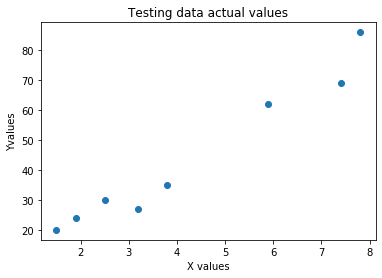

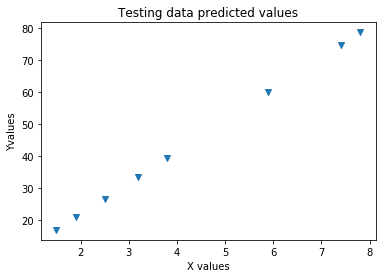

In [28]:
# Now lets visualize the predicted and actual values

plt.scatter(x_test,y_test)
plt.xlabel('X values')
plt.ylabel('Yvalues')
plt.title('Testing data actual values')
plt.show()



plt.scatter(x_test,y_pred,marker = 'v')
plt.xlabel('X values')
plt.ylabel('Yvalues')
plt.title('Testing data predicted values')
plt.show()

## evaluating the Algorithm

The final step is to evaluate the performance of algorithm.  This step is perticularly important to compare how well different algorithm perform on a perticular dataset. For regression algorithm, three evaluation metrice are commonly used.



1) Mean Absolute Error
2) Mean Squared Error
3) Root Mean Squared Error 

In [30]:
from sklearn import metrics
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error : 4.419727808027652


In [32]:
print('Mean Squared Error :',metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error : 22.96509721270043


In [33]:
print('Root Mean Squared Error :',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Squared Error : 4.792191274636315
